# II. Data Pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import library 
import os
import numpy as np
import pandas as pd 

# Ploting library
import matplotlib.pyplot as plt 
import seaborn as sns

# Libraries for ML 

from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [192]:
#pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [ ]:
char_dic = {'firm_variable':['absacc', 'acc', 'aeavol', 'age', 'agr', 'baspread', 'beta', 'betasq', 'bm', 'bm_ia', 'cash', 'cashdebt', 'cashpr', 'cfp', 'cfp_ia', 'chatoia', 
                             'chcsho','chempia', 'chfeps', 'chinv', 'chmom', 'chnanalyst', 'chpmia', 'chtx', 
                             'cinvest', 'convind', 'currat', 'depr', 'disp', 'divi', 'divo', 'dolvol', 'dy', 'ear', 'egr', 'ep', 'fgr5yr', 'gma', 'grcapx', 'grltnoa', 
                             'herf', 'hire', 'idiovol', 'ill', 'indmom', 'invest', 'ipo', 'lev', 'lgr', 'maxret', 'mom12m', 'mom1m', 'mom36m', 'mom6m', 'ms', 'mve', 
                             'mve_ia', 'nanalyst', 'nincr', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 
                             'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'pricedelay', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale', 'realestate', 'retvol', 'roaq', 'roavol', 'roeq', 'roic', 
                             'rsup', 'salecash', 'saleinv', 'salerec', 'secured', 'securedind', 'sfe', 'sgr', 'sgrvol', 'sin', 'sp', 'std_dolvol', 'std_turn', 'stdacc', 'stdcf', 'sue', 
                             'tang', 'tb', 'turn', 'zerotrade'],
            
            'core_firm': ['acc', 'agr', 'beta', 'bm', 'cash','cashpr', 'cfp','chatoia', 'chcsho','chfeps',
                          'chinv', 'chmom','chpmia', 'chtx','currat', 'depr','dy', 'ear', 'ep', 'gma',
                          'grcapx', 'grltnoa','ill', 'indmom', 'invest','lev', 'lgr', 'maxret', 'mom12m', 'mom1m',
                          'mom36m','mve','nincr','orgcap','pchgm_pchsale','pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga','retvol', 'roaq', 
                          'roavol', 'roeq','salecash', 'saleinv','sgr','sp', 'std_dolvol', 'std_turn', 'turn',],
            
            'macro_variable':['RPI','W875RX1','DPCERA3M086SBEA','CMRMTSPLx','RETAILx','INDPRO','IPFPNSS','IPFINAL','IPCONGD',
                               'IPDCONGD','IPNCONGD','IPBUSEQ','IPMAT','IPDMAT','IPNMAT','IPMANSICS','IPB51222S','IPFUELS','CUMFNS',
                               'HWI','HWIURATIO','CLF16OV','CE16OV','UNRATE','UEMPMEAN','UEMPLT5','UEMP5TO14','UEMP15OV','UEMP15T26',
                               'UEMP27OV','CLAIMSx','PAYEMS','USGOOD','CES1021000001','USCONS','MANEMP','DMANEMP','NDMANEMP','SRVPRD',
                               'USTPU','USWTRADE','USTRADE','USFIRE','USGOVT','CES0600000007','AWOTMAN','AWHMAN','HOUST','HOUSTNE',
                               'HOUSTMW','HOUSTS','HOUSTW','PERMIT','PERMITNE','PERMITMW','PERMITS','PERMITW','AMDMNOx','ANDENOx',
                               'AMDMUOx','BUSINVx','ISRATIOx','M1SL','M2SL','M2REAL','BOGMBASE','TOTRESNS','NONBORRES','BUSLOANS',
                               'REALLN','NONREVSL','CONSPI','S&P 500','S&P: indust','S&P div yield','S&P PE ratio','FEDFUNDS','CP3Mx','TB3MS',
                               'TB6MS','GS1','GS5','GS10','AAA','BAA','COMPAPFFx','TB3SMFFM','TB6SMFFM','T1YFFM',
                               'T5YFFM','T10YFFM','AAAFFM','BAAFFM','TWEXAFEGSMTHx','EXSZUSx','EXJPUSx','EXUSUKx','EXCAUSx','WPSFD49207',
                               'WPSFD49502','WPSID61','WPSID62','OILPRICEx','PPICMM','CPIAUCSL','CPIAPPSL','CPITRNSL','CPIMEDSL','CUSR0000SAC',
                               'CUSR0000SAD','CUSR0000SAS','CPIULFSL','CUSR0000SA0L2','CUSR0000SA0L5','PCEPI','DDURRG3M086SBEA','DNDGRG3M086SBEA','DSERRG3M086SBEA','CES0600000008',
                               'CES2000000008','CES3000000008','UMCSENTx','DTCOLNVHFNM','DTCTHFNM','INVEST','VIXCLSx','dp','ep','b/m','ntis','tbl','tms','dfy','svar'],
            
            
            'core_variable': ['yyyymm','fyear','year','jyear','permno','ticker','comnam','exchcd','exchname','siccd',
                              'indname','size_class','mve_m','rf','ret','ret_adj','ret_ex','ret_adj_ex',],

            'label':['predicted_return'],

            'all_variable':['absacc', 'acc', 'aeavol', 'age', 'agr', 'baspread', 'beta', 'betasq', 'bm', 'bm_ia', 'cash', 'cashdebt', 'cashpr', 'cfp', 'cfp_ia', 'chatoia', 
                             'chcsho','chempia', 'chfeps', 'chinv', 'chmom', 'chnanalyst', 'chpmia', 'chtx', 
                             'cinvest', 'convind', 'currat', 'depr', 'disp', 'divi', 'divo', 'dolvol', 'dy', 'ear', 'egr', 'ep', 'fgr5yr', 'gma', 'grcapx', 'grltnoa', 
                             'herf', 'hire', 'idiovol', 'ill', 'indmom', 'invest', 'ipo', 'lev', 'lgr', 'maxret', 'mom12m', 'mom1m', 'mom36m', 'mom6m', 'ms', 'mve', 
                             'mve_ia', 'nanalyst', 'nincr', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 
                             'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'pricedelay', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale', 'realestate', 'retvol', 'roaq', 'roavol', 'roeq', 'roic', 
                             'rsup', 'salecash', 'saleinv', 'salerec', 'secured', 'securedind', 'sfe', 'sgr', 'sgrvol', 'sin', 'sp', 'std_dolvol', 'std_turn', 'stdacc', 'stdcf', 'sue', 
                             'tang', 'tb', 'turn', 'zerotrade',
                             'RPI','W875RX1','DPCERA3M086SBEA','CMRMTSPLx','RETAILx','INDPRO','IPFPNSS','IPFINAL','IPCONGD',
                               'IPDCONGD','IPNCONGD','IPBUSEQ','IPMAT','IPDMAT','IPNMAT','IPMANSICS','IPB51222S','IPFUELS','CUMFNS',
                               'HWI','HWIURATIO','CLF16OV','CE16OV','UNRATE','UEMPMEAN','UEMPLT5','UEMP5TO14','UEMP15OV','UEMP15T26',
                               'UEMP27OV','CLAIMSx','PAYEMS','USGOOD','CES1021000001','USCONS','MANEMP','DMANEMP','NDMANEMP','SRVPRD',
                               'USTPU','USWTRADE','USTRADE','USFIRE','USGOVT','CES0600000007','AWOTMAN','AWHMAN','HOUST','HOUSTNE',
                               'HOUSTMW','HOUSTS','HOUSTW','PERMIT','PERMITNE','PERMITMW','PERMITS','PERMITW','AMDMNOx','ANDENOx',
                               'AMDMUOx','BUSINVx','ISRATIOx','M1SL','M2SL','M2REAL','BOGMBASE','TOTRESNS','NONBORRES','BUSLOANS',
                               'REALLN','NONREVSL','CONSPI','S&P 500','S&P: indust','S&P div yield','S&P PE ratio','FEDFUNDS','CP3Mx','TB3MS',
                               'TB6MS','GS1','GS5','GS10','AAA','BAA','COMPAPFFx','TB3SMFFM','TB6SMFFM','T1YFFM',
                               'T5YFFM','T10YFFM','AAAFFM','BAAFFM','TWEXAFEGSMTHx','EXSZUSx','EXJPUSx','EXUSUKx','EXCAUSx','WPSFD49207',
                               'WPSFD49502','WPSID61','WPSID62','OILPRICEx','PPICMM','CPIAUCSL','CPIAPPSL','CPITRNSL','CPIMEDSL','CUSR0000SAC',
                               'CUSR0000SAD','CUSR0000SAS','CPIULFSL','CUSR0000SA0L2','CUSR0000SA0L5','PCEPI','DDURRG3M086SBEA','DNDGRG3M086SBEA','DSERRG3M086SBEA','CES0600000008',
                               'CES2000000008','CES3000000008','UMCSENTx','DTCOLNVHFNM','DTCTHFNM','INVEST','VIXCLSx','dp','ep','b/m','ntis','tbl','tms','dfy','svar'
                            ]
            }

print(len(char_dic['firm_variable'])) # 103
print(len(char_dic['core_firm'])) # 49
print(len(char_dic['macro_variable'])) # 134 one variable is excluded because of missing value 
print(len(char_dic['all_variable'])) # 134 one variable is excluded because of missing value 

103
49
134
237


In [21]:
# Import dataset 
# data_raw = pd.read_pickle('7_chars_data.pkl')
# firm data
file_name = '/content/drive/MyDrive/Colab Notebooks/Dataset/'
data = pd.read_pickle(file_name+'4_firm_norm_with_predicted_return.pkl')
data.insert(1, 'yyyymm',pd.to_datetime(data['jdate']).dt.to_period('M') )
del(data['jdate'])

# macro data
macro = pd.read_csv(file_name+'3_total_macro_normalized.csv')
macro.insert(1, 'yyyymm',pd.to_datetime(macro['sasdate']).dt.to_period('M') )
del(macro['sasdate'])

In [ ]:
df_all = pd.merge(data, macro, how='left', on='yyyymm', suffixes=('','_macro'))
df_all.head()

,yyyymm,fyear,year,jyear,permno,ticker,comnam,exchcd,exchname,siccd,...,INVEST,VIXCLSx,dp,ep_macro,b/m,ntis,tbl,tms,dfy,svar
0,1980-01,1978.0,1980,1978,10006,ACF,A C F INDUSTRIES INC,1.0,NYSE,3743.0,...,-0.00604,21.0903,-0.047215,-0.046428,-0.043294,0.000783,-0.0004,-0.0086,0.0001,1.401004
1,1980-01,1978.0,1980,1978,10057,AMT,ACME CLEVELAND CORP,1.0,NYSE,3541.0,...,-0.00604,21.0903,-0.047215,-0.046428,-0.043294,0.000783,-0.0004,-0.0086,0.0001,1.401004
2,1980-01,1978.0,1980,1978,10103,ACSC,A C S INDUSTRIES INC,3.0,NASDAQ,3496.0,...,-0.00604,21.0903,-0.047215,-0.046428,-0.043294,0.000783,-0.0004,-0.0086,0.0001,1.401004
3,1980-01,1978.0,1980,1978,10137,AYP,ALLEGHENY POWER SYSTEMS INC,1.0,NYSE,4911.0,...,-0.00604,21.0903,-0.047215,-0.046428,-0.043294,0.000783,-0.0004,-0.0086,0.0001,1.401004
4,1980-01,1978.0,1980,1978,10145,ACD,ALLIED CHEMICAL CORP,1.0,NYSE,2812.0,...,-0.00604,21.0903,-0.047215,-0.046428,-0.043294,0.000783,-0.0004,-0.0086,0.0001,1.401004


## 2.1Plot Distribution of each feature

### Plot distribution of macro-economic variables

<ipython-input-14-2b5d6a8ed26e>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  macro[char_dic['macro_variable']].hist(


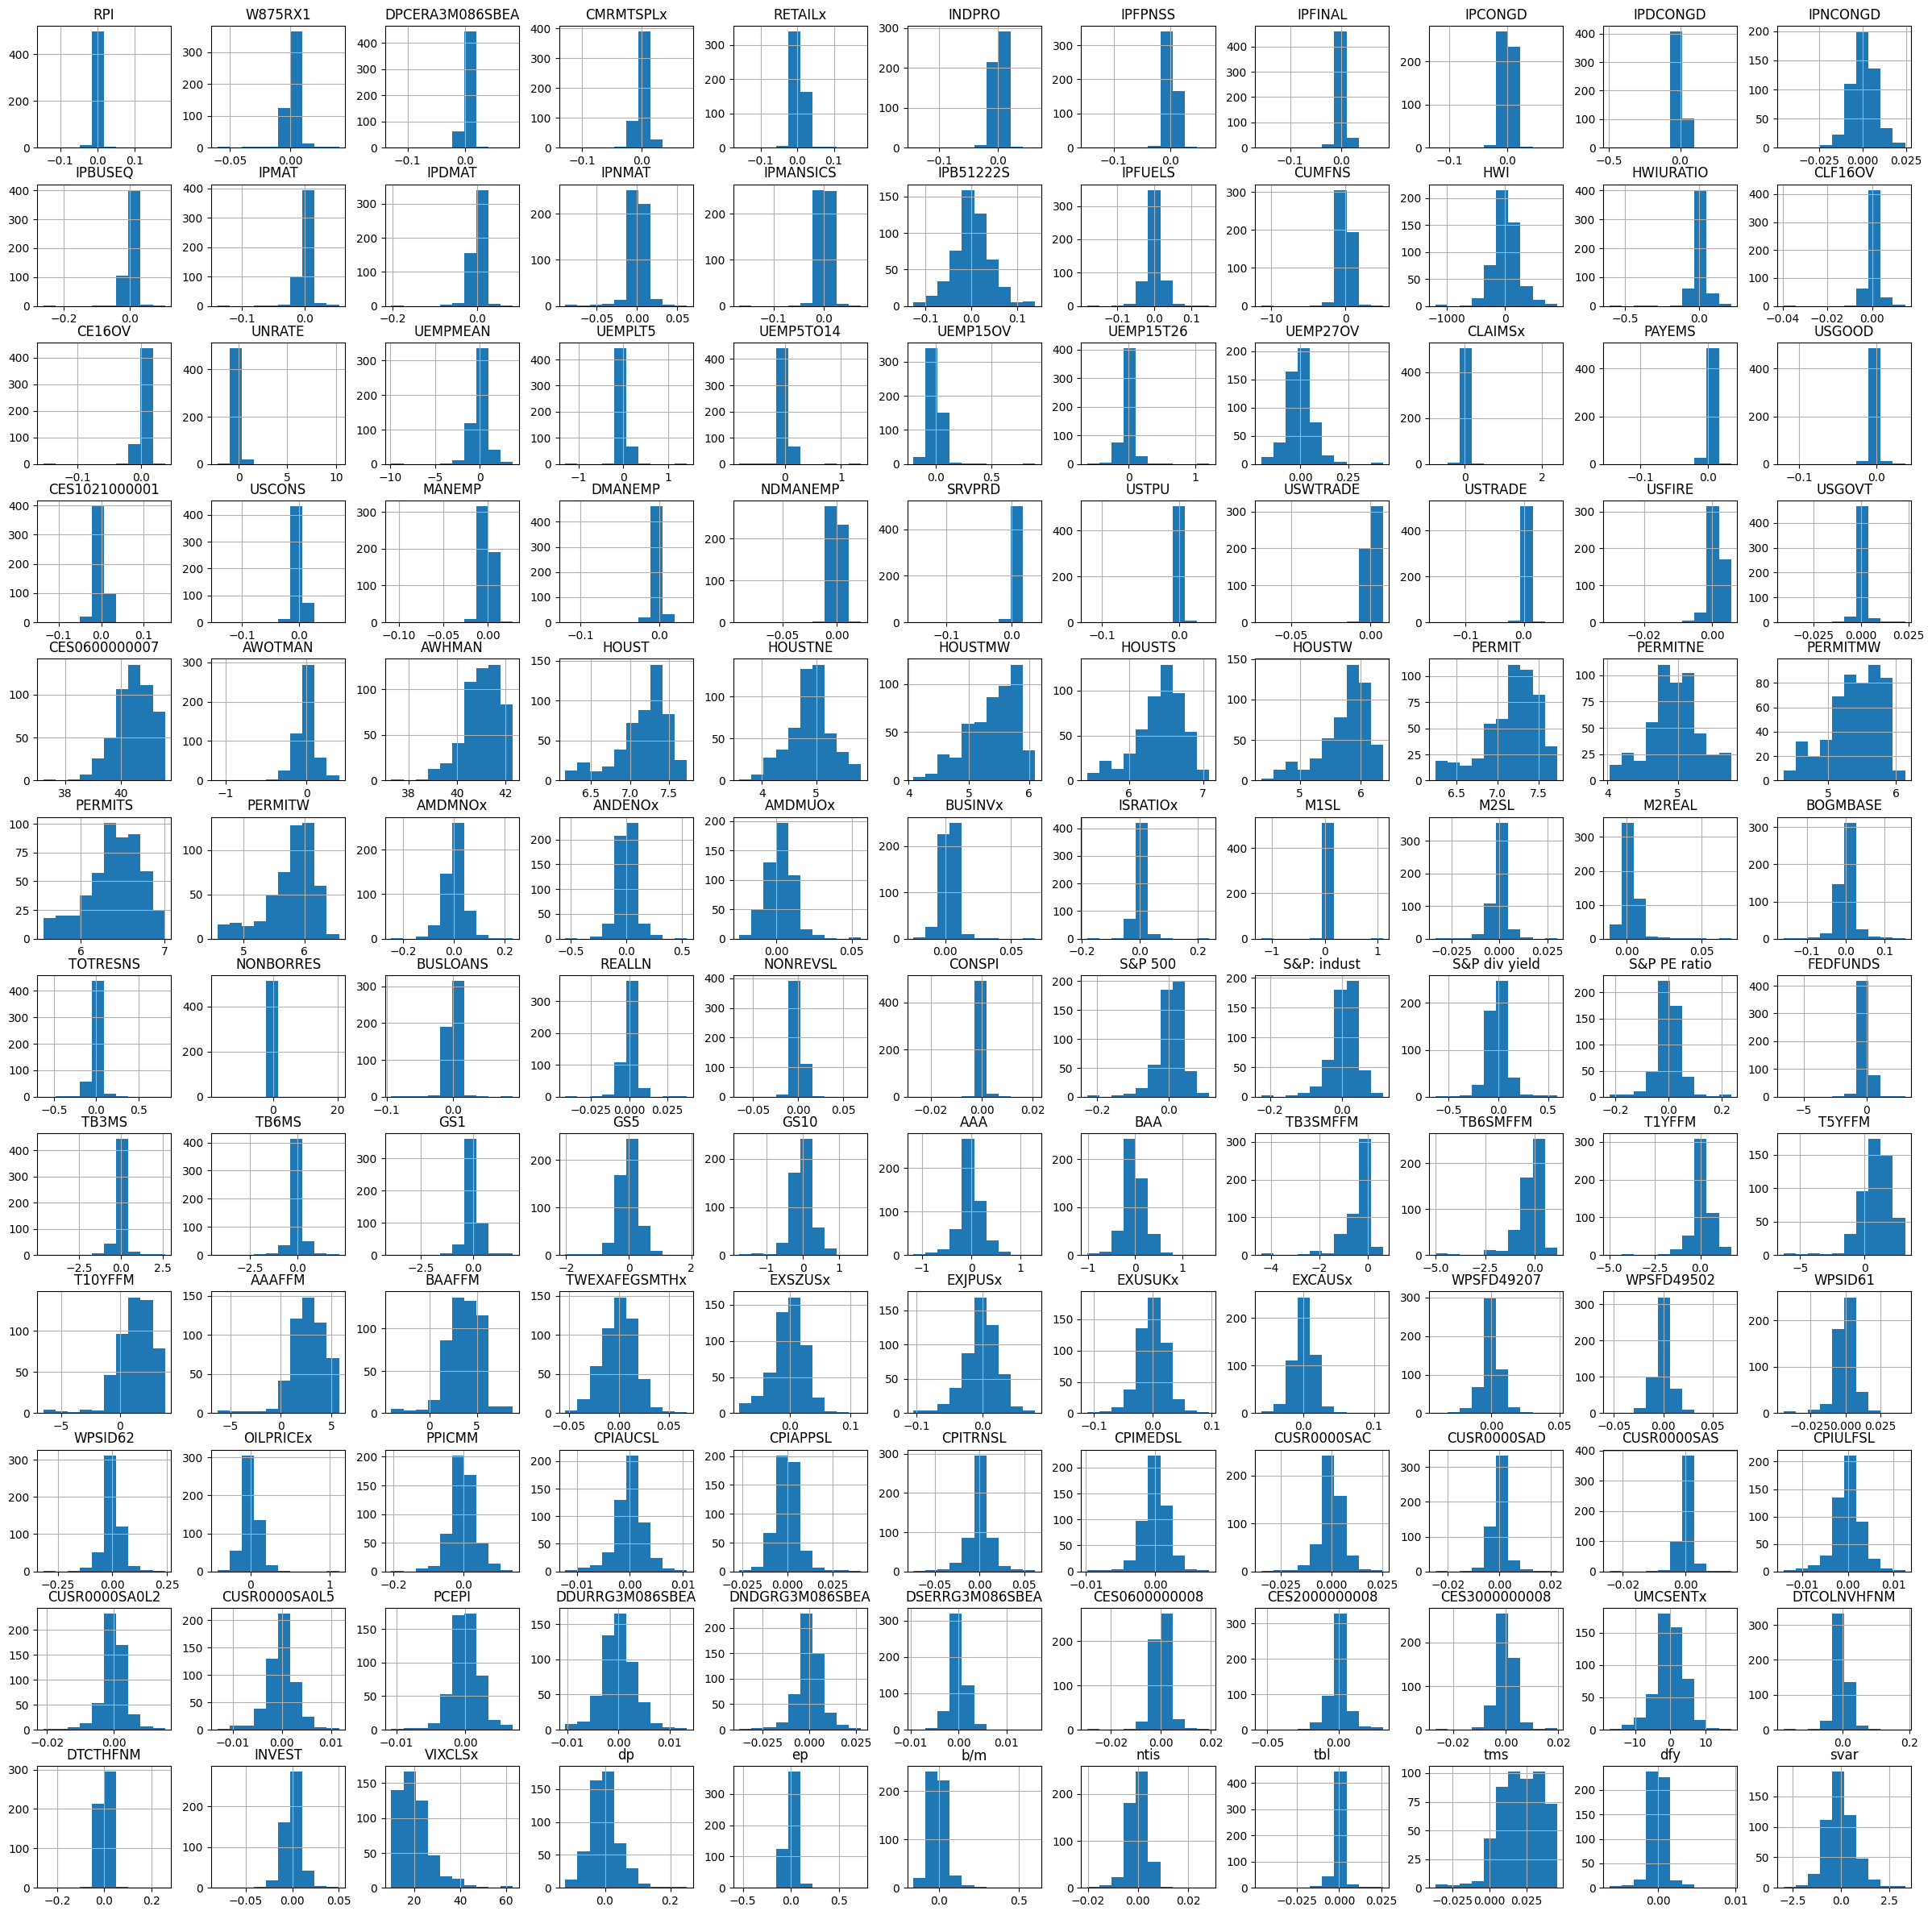

In [ ]:
import os
fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)
macro[char_dic['macro_variable']].hist(
    #layout=(12, 6),
    # bins=np.linspace(-2,2,30), 
    ax=ax)
# Save the figure
file_image = file_name+'images'
if not os.path.exists(file_image):
    os.makedirs(file_image)
plt.savefig(file_image+'/macro_hist.png',bbox_inches='tight') 

### Plot distribution of firm-level variables

<ipython-input-15-f54e6f3155ed>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data [char_dic['firm_variable']].hist(


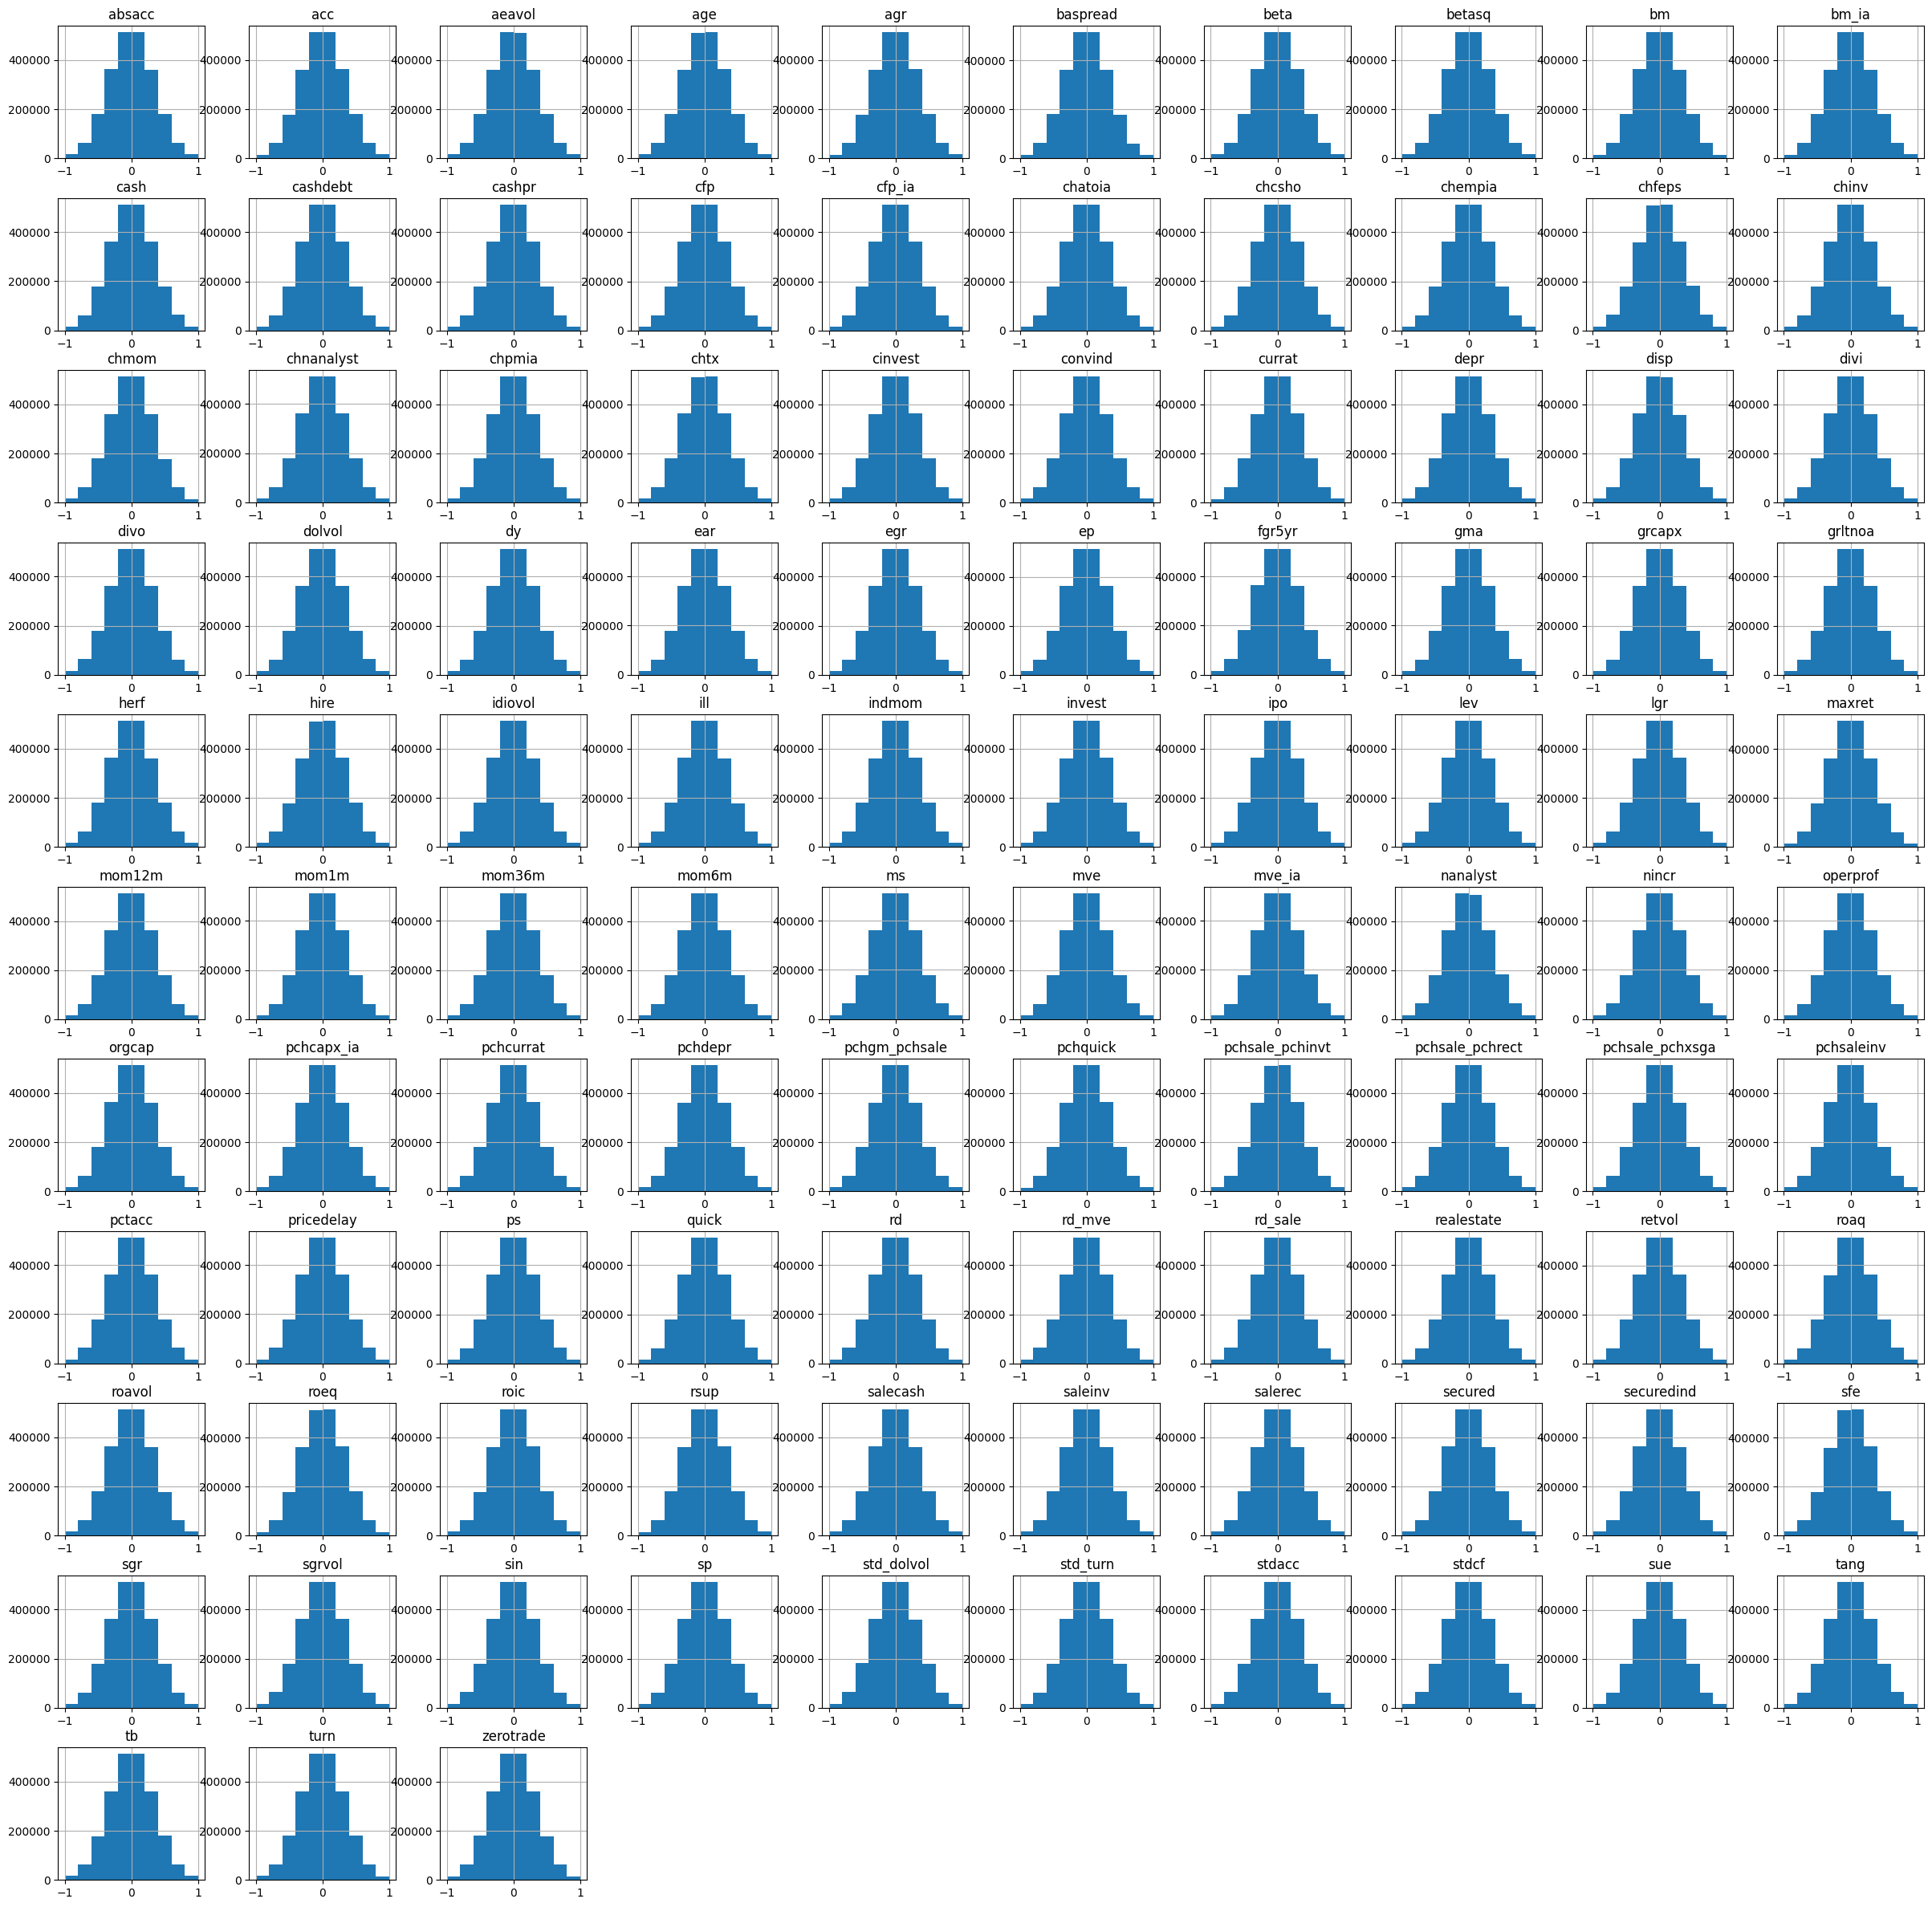

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)
data [char_dic['firm_variable']].hist(
    #layout=(12, 6),
    # bins=np.linspace(-2,2,30), 
    ax=ax)
# Save the figure
plt.savefig(file_image+'/firm_hist.png',bbox_inches='tight') 

## 2.2Correlation of features

### 2.2.1 Firm variable / all variables / with microcaps 

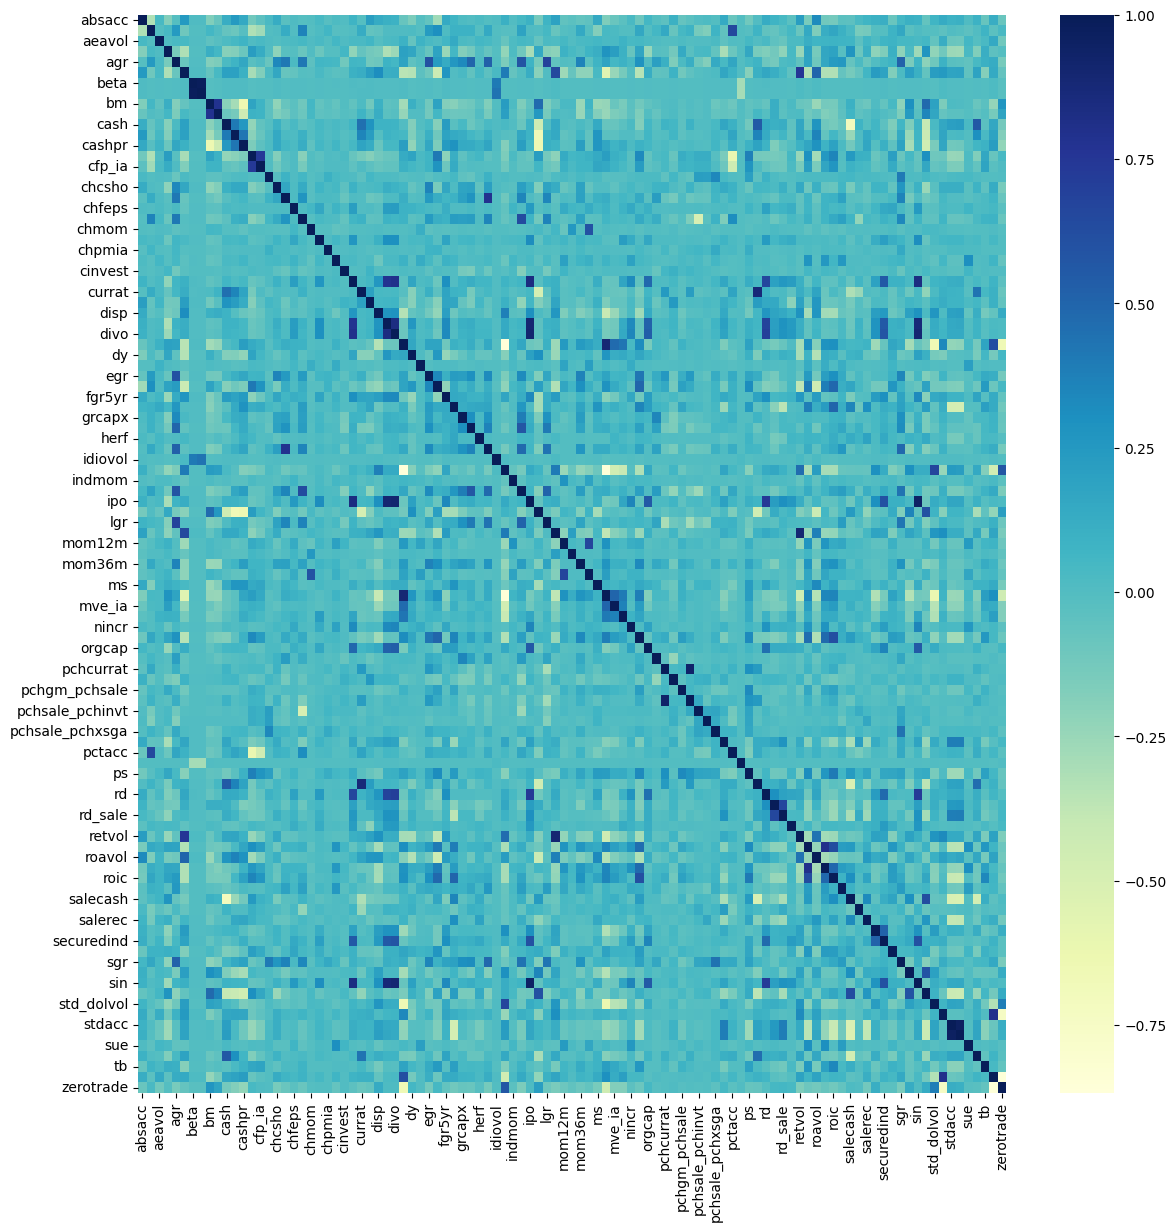

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot firm-level characteristics [all variables] [with microcaps]
plt.figure(figsize = (14,14))
sns.heatmap(data=data[char_dic['firm_variable']].corr(), cmap="YlGnBu")
#plt.title('Correlation Heatmap')
plt.show()
plt.savefig(file_image+'/corr_withmicro_all.png',bbox_inches='tight') 
plt.gcf().clear()

In [ ]:
# Show top correlated Features
c = data[char_dic['firm_variable']].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['col_1','col_2', 'corr']
so = so.sort_values(by = ['corr', 'col_1'], ascending = False)
so = so[so['corr']!=1]
so = so.iloc[::2].reset_index(drop=True)
so[20]

,col_1,col_2,corr
0,betasq,beta,0.985078
1,stdcf,stdacc,0.962242
2,sin,ipo,0.947440
3,pchquick,pchcurrat,0.933830
4,ipo,divo,0.909644
...,...,...,...
5248,retvol,pricedelay,0.000020
5249,pchsale_pchxsga,cinvest,0.000018
5250,rsup,pricedelay,0.000016
5251,sue,idiovol,0.000012


In [ ]:
so['corr'].describe(), 

count    5253.000000
mean        0.090625
std         0.116748
min         0.000010
25%         0.016044
50%         0.051480
75%         0.120441
max         0.985078
Name: corr, dtype: float64

### 2.2.2 Firm variable / core variables / with microcaps

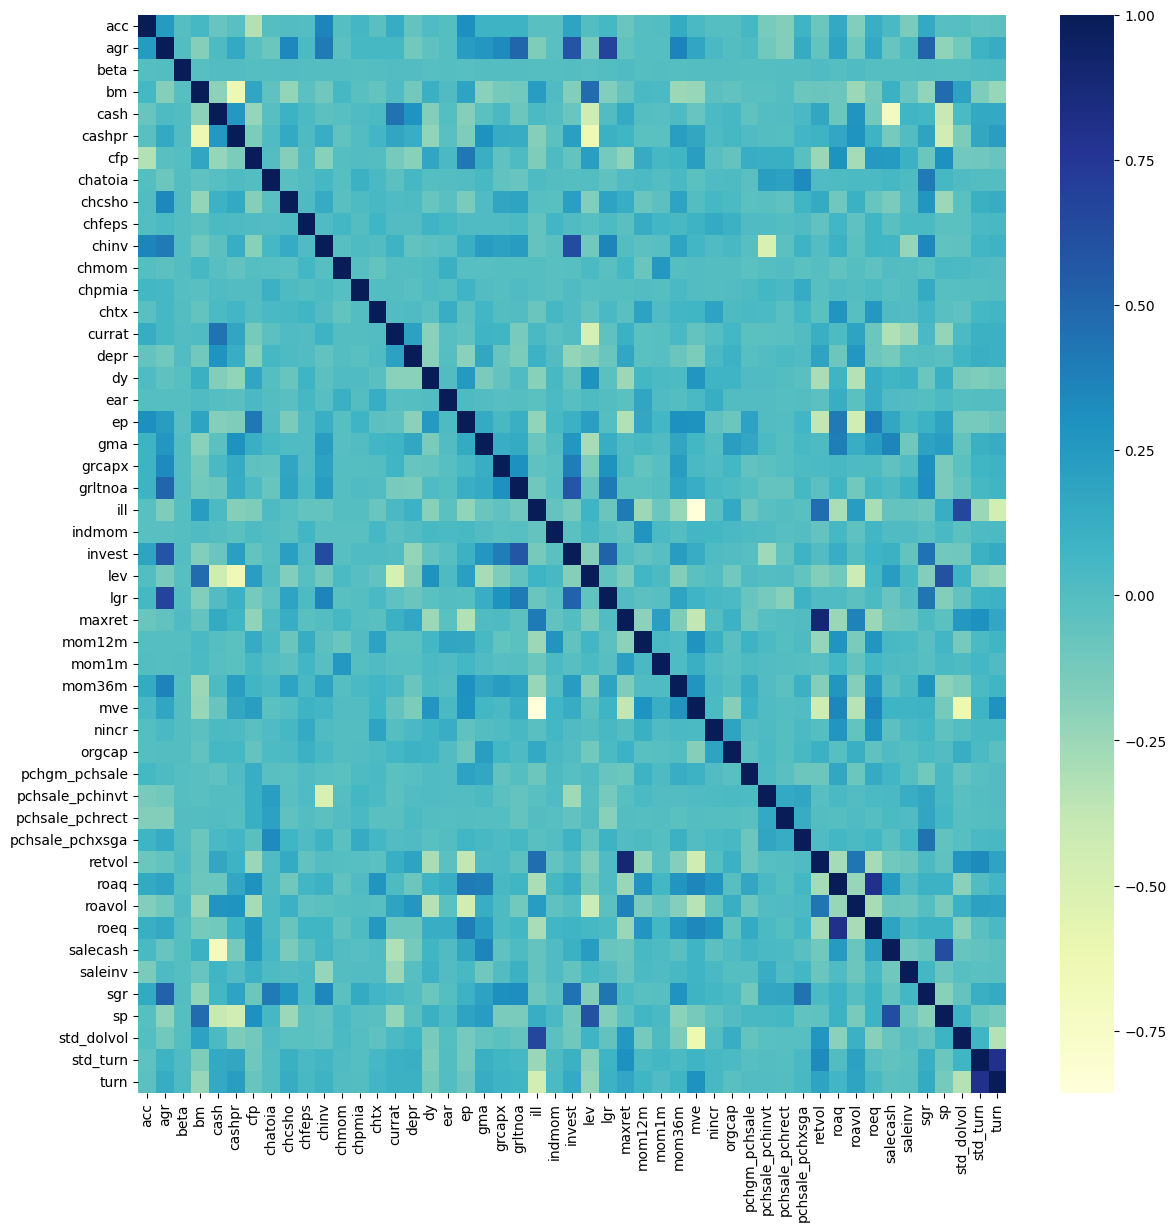

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot firm-level characteristics [core variables] [with microcaps]
plt.figure(figsize = (14,14))
sns.heatmap(data=data[char_dic['core_firm']].corr(), cmap="YlGnBu")
plt.show()
plt.savefig(file_image+'/corr_withmicro_core.png',bbox_inches='tight') 
plt.gcf().clear()

In [ ]:
# Show top correlated Features
c = data[char_dic['core_firm']].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['col_1','col_2', 'corr']
so = so.sort_values(by = ['corr', 'col_1'], ascending = False)
so = so[so['corr']!=1]
so = so.iloc[::2].reset_index(drop=True)
so[:20]

,col_1,col_2,corr
0,retvol,maxret,0.892960
1,mve,ill,0.857037
2,turn,std_turn,0.798570
3,roeq,roaq,0.797635
4,salecash,cash,0.703688
5,lgr,agr,0.679690
6,std_dolvol,ill,0.665806
7,lev,cashpr,0.642668
8,invest,chinv,0.641219
9,cashpr,bm,0.637360


In [ ]:
so['corr'].describe()

count    1176.000000
mean        0.096934
std         0.120886
min         0.000023
25%         0.017002
50%         0.050977
75%         0.132596
max         0.892960
Name: corr, dtype: float64

### 2.2.3 Firm variable / all variables / no microcaps 

In [ ]:
#pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
df_noMicro = data[data['size_class'] != 'Micro']

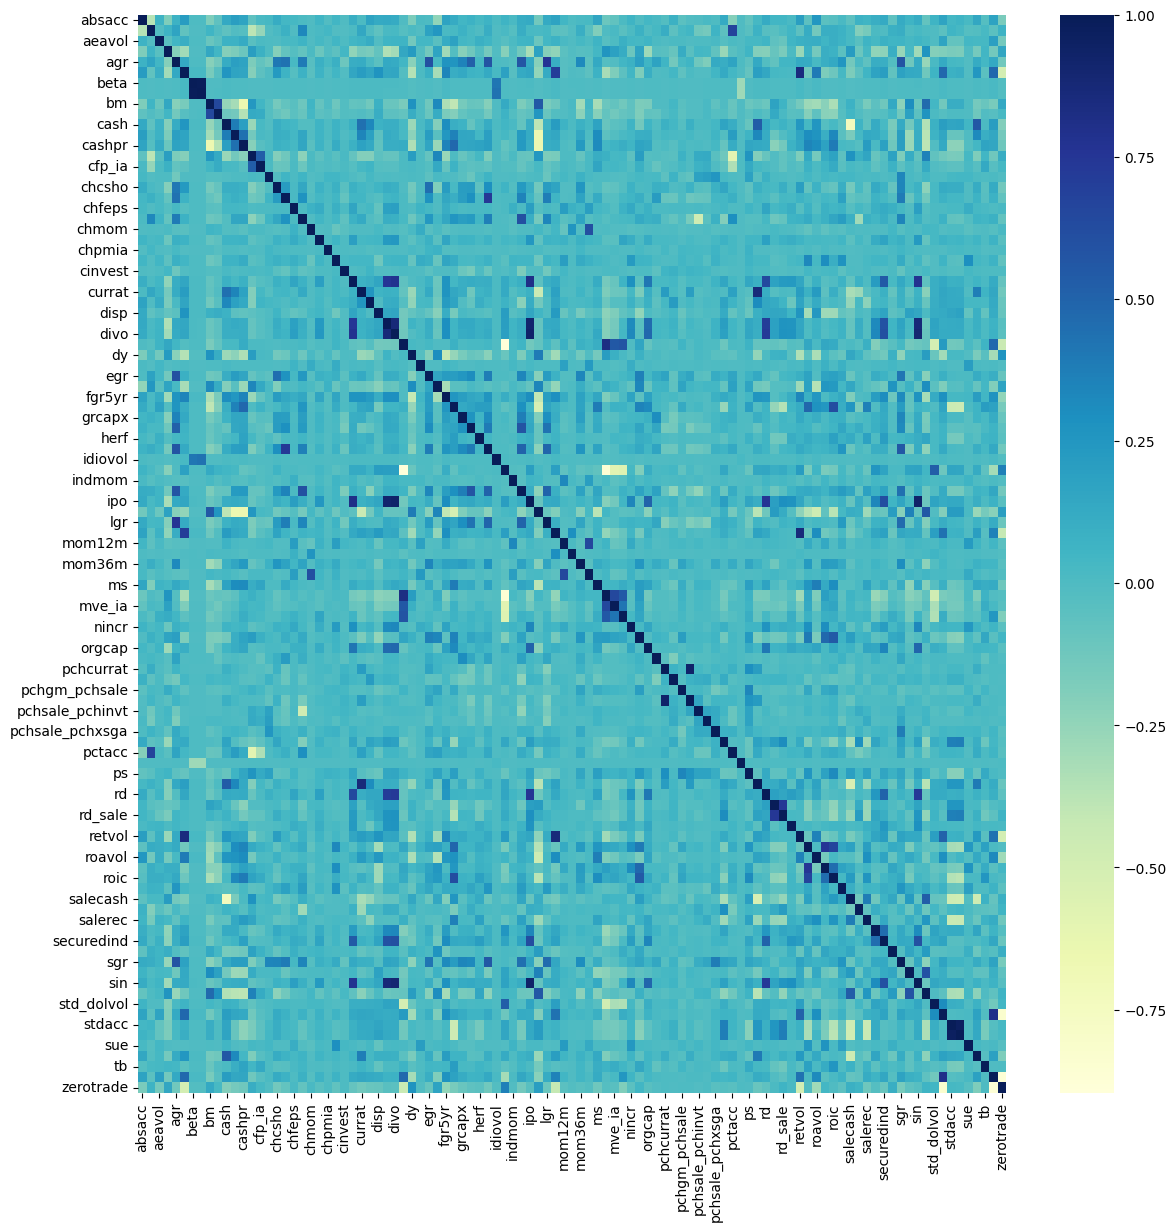

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot firm-level characteristics [all variables] [with microcaps]
plt.figure(figsize = (14,14))
sns.heatmap(data=df_noMicro[char_dic['firm_variable']].corr(), cmap="YlGnBu")
#plt.title('Correlation Heatmap')
plt.savefig(file_image+'/corr_micro_all.png',bbox_inches='tight') 
plt.show()
plt.gcf().clear()

In [ ]:
# Show top correlated Features
c = df_noMicro[char_dic['firm_variable']].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['col_1','col_2', 'corr']
so = so.sort_values(by = ['corr', 'col_1'], ascending = False)
so = so[so['corr']!=1]
so = so.iloc[::2].reset_index(drop=True)
so[:20]

,col_1,col_2,corr
0,betasq,beta,0.985256
1,stdcf,stdacc,0.967794
2,sin,ipo,0.933150
3,ipo,divo,0.932983
4,pchquick,pchcurrat,0.929816
5,ipo,divi,0.912948
6,ill,dolvol,0.896460
7,sin,divo,0.892303
8,zerotrade,turn,0.871903
9,sin,divi,0.869517


In [ ]:
so['corr'].mean()

0.08700130471825689

### 2.2.4Firm variable / core variables / no microcaps

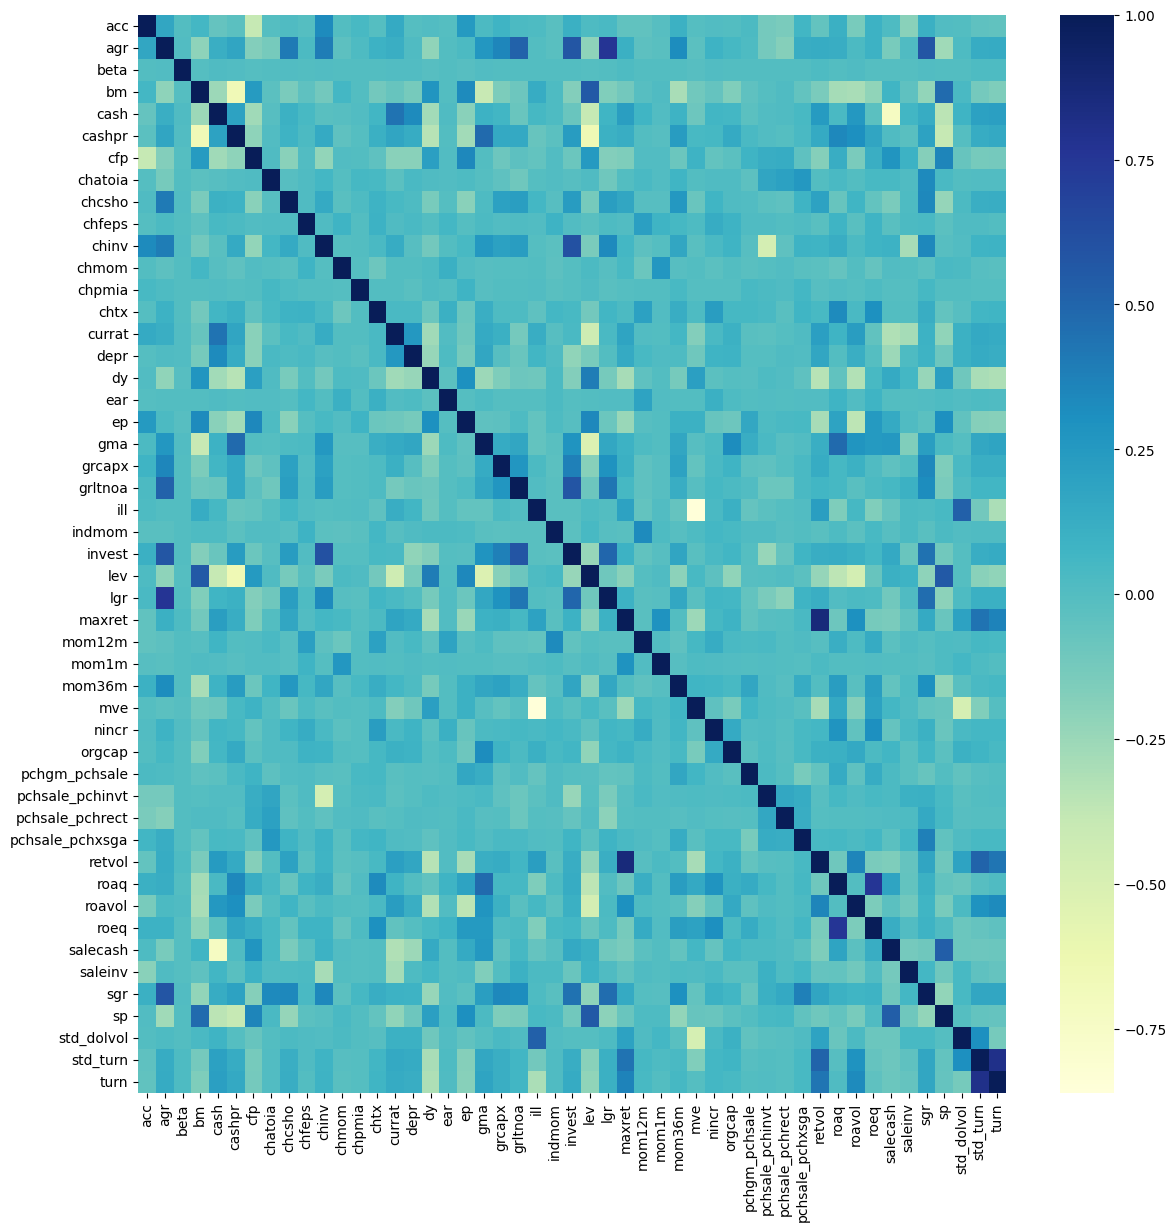

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot firm-level characteristics [all variables] [with microcaps]
plt.figure(figsize = (14,14))
sns.heatmap(data=df_noMicro[char_dic['core_firm']].corr(), cmap="YlGnBu")
#plt.title('Correlation Heatmap')
plt.show()
plt.savefig(file_image+'/corr_micro_core.png',bbox_inches='tight') 
plt.gcf().clear()

In [ ]:
# Show top correlated Features
c = df_noMicro[char_dic['core_firm']].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['col_1','col_2', 'corr']
so = so.sort_values(by = ['corr', 'col_1'], ascending = False)
so = so[so['corr']!=1]
so = so.iloc[::2].reset_index(drop=True)
so[:20]

,col_1,col_2,corr
0,retvol,maxret,0.865167
1,mve,ill,0.860415
2,turn,std_turn,0.806518
3,lgr,agr,0.760204
4,roeq,roaq,0.754167
5,salecash,cash,0.727206
6,cashpr,bm,0.658674
7,lev,cashpr,0.648536
8,invest,chinv,0.603874
9,invest,grltnoa,0.584048


In [ ]:
so['corr'].mean()

0.09468833818798608

### 2.2.5 Macro economic variable 

<ipython-input-6-f8eb6193df79>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=macro[char_dic['macro_variable']].corr(), cmap="YlGnBu")


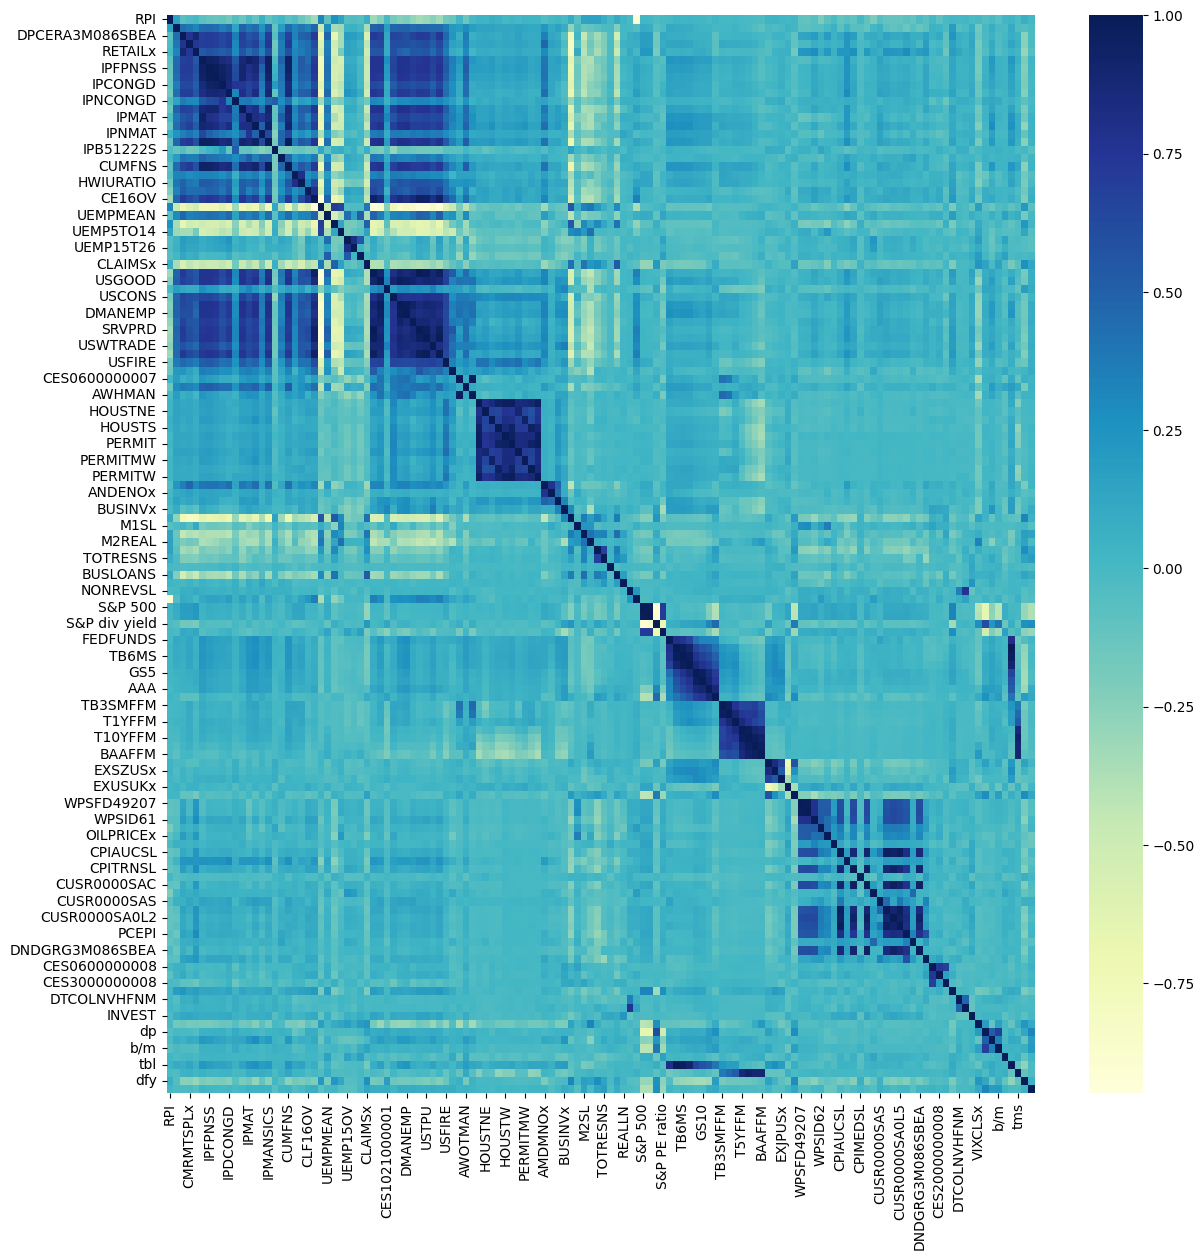

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot firm-level characteristics [all variables] [with microcaps]
plt.figure(figsize = (14,14))
sns.heatmap(data=macro[char_dic['macro_variable']].corr(), cmap="YlGnBu")
#plt.title('Correlation Heatmap')
plt.show()
#plt.savefig(file_image+'/corr_macro.png',bbox_inches='tight') 
plt.gcf().clear()

In [7]:
# Show top correlated Features
c = macro[char_dic['macro_variable']].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['col_1','col_2', 'corr']
so = so.sort_values(by = ['corr', 'col_1'], ascending = False)
so = so[so['corr']!=1]
so = so.iloc[::2].reset_index(drop=True)
so[:49]

<ipython-input-7-c30b9f098406>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = macro[char_dic['macro_variable']].corr().abs()


,col_1,col_2,corr
0,tbl,TB3MS,1.000000
1,SRVPRD,PAYEMS,0.995415
2,WPSFD49502,WPSFD49207,0.991589
3,S&P: indust,S&P 500,0.990128
4,IPFPNSS,IPFINAL,0.989103
5,MANEMP,DMANEMP,0.988638
6,USTRADE,USTPU,0.983112
7,IPMANSICS,CUMFNS,0.981570
8,PERMIT,HOUST,0.974618
9,PERMITW,PERMIT,0.974391


In [ ]:
so['corr'].mean()

0.13874535237449892

### 2.2.6 Firm variables with macro variables 

## 2.3Microcaps Plots 

### 2.3.1Plot market capitalization

In [223]:
new_dict = {}
new_df = data[char_dic['core_variable']]
for i in new_df['yyyymm'].unique():
  df = new_df[new_df['yyyymm'] == i]
  micro = df[df['size_class']=='Micro']['mve_m'].sum()
  small = df[df['size_class']=='Small']['mve_m'].sum()
  large = df[df['size_class']=='Large']['mve_m'].sum()
  new_dict[i] = [micro,small,large]
  
new_df = pd.DataFrame.from_dict(new_dict, orient='index', columns =['Micro','Small','Large'])
new_df.head()

,Micro,Small,Large
1980-01,3.526935e+07,8.458607e+07,8.475079e+08
1980-02,3.752311e+07,8.862831e+07,8.965012e+08
1980-03,3.613536e+07,8.650984e+07,8.865949e+08
1980-04,2.963426e+07,7.134180e+07,7.916156e+08
1980-05,3.096514e+07,7.596909e+07,8.302075e+08


<Figure size 2500x300 with 0 Axes>

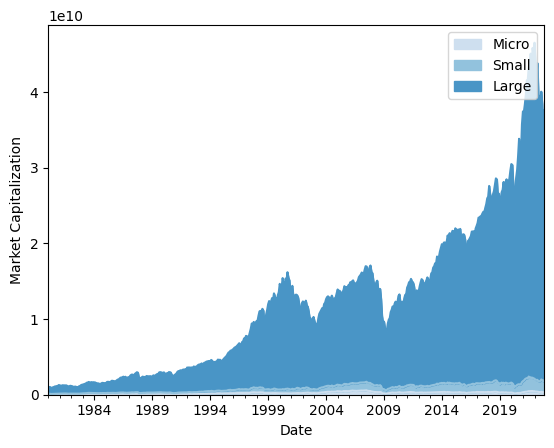

In [224]:
plt.figure(figsize=(25,3))
colors = ['#CEDFEF', '#92C2DD', '#4995C6']
new_df.plot.area(stacked = True, color=colors)
plt.xlabel('Date')
plt.ylabel('Market Capitalization')
# Display the legend
plt.legend(loc='upper right')
# Display the plot
# plt.savefig(file_name+'/microcaps.png',bbox_inches='tight')
plt.show()

In [225]:
new_percent = pd.DataFrame()
new_percent.index = new_df.index 
new_percent['Micro_percent'] = new_df['Micro'] / (new_df['Micro'] +new_df['Small'] + new_df['Large']  )
new_percent['Small_percent'] = new_df['Small'] / (new_df['Micro'] +new_df['Small'] + new_df['Large']  )
new_percent['Large_percent'] = new_df['Large'] / (new_df['Micro'] +new_df['Small'] + new_df['Large']  )
new_percent.head()

,Micro_percent,Small_percent,Large_percent
1980-01,0.036459,0.087440,0.876101
1980-02,0.036692,0.086665,0.876643
1980-03,0.035805,0.085718,0.878478
1980-04,0.033200,0.079927,0.886873
1980-05,0.033042,0.081065,0.885893


In [233]:
new_percent.describe()

,Micro_percent,Small_percent,Large_percent
count,515.000000,515.000000,515.000000
mean,0.025409,0.064596,0.909995
std,0.010294,0.016488,0.026229
min,0.006055,0.033483,0.849498
25%,0.016981,0.053111,0.890949
50%,0.024292,0.062015,0.910958
75%,0.033562,0.076470,0.930367
max,0.049592,0.100910,0.960462


<Figure size 2500x300 with 0 Axes>

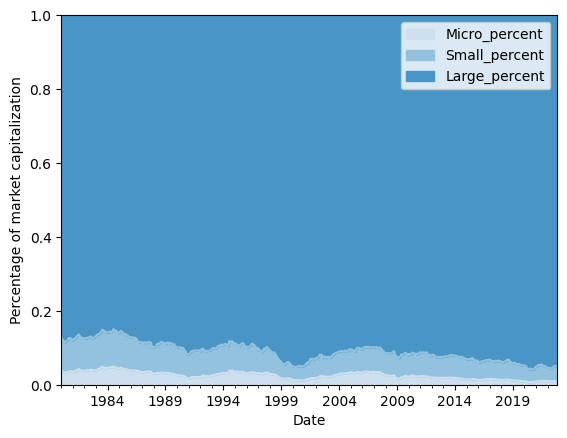

In [227]:
plt.figure(figsize=(25,3))
colors = ['#CEDFEF', '#92C2DD', '#4995C6']
new_percent.plot.area(stacked = True, color=colors)
plt.xlabel('Date')
plt.ylabel('Percentage of market capitalization')
plt.ylim([0,1])
# Display the legend
plt.legend(loc='upper right')
# Display the plot
# plt.savefig(file_name+'/microcaps.png',bbox_inches='tight') 
plt.show()

###2.3.1Stock Number

In [228]:
date_dic = {}
for i in data['yyyymm'].unique():
  df = data[data['yyyymm'] == i]
  micro,small,large = df['size_class'].value_counts()[0], df['size_class'].value_counts()[1],df['size_class'].value_counts()[2]
  date_dic[i] = [micro,small,large]

date_df = pd.DataFrame.from_dict(date_dic, orient='index', columns =['Micro','Small','Large'])
date_df.head()

,Micro,Small,Large
1980-01,1985,785,774
1980-02,1968,793,783
1980-03,1965,801,776
1980-04,2003,792,775
1980-05,2014,797,774


<Figure size 2500x300 with 0 Axes>

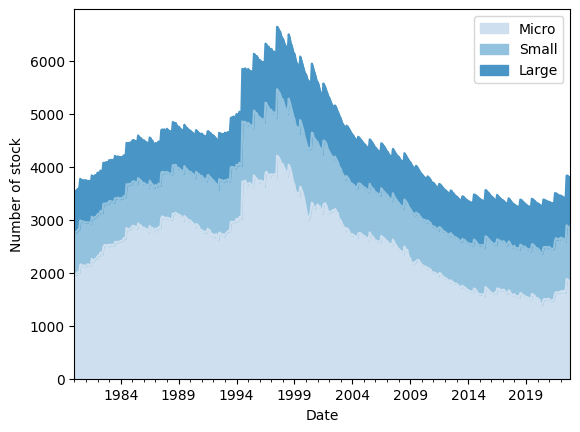

In [229]:
plt.figure(figsize=(25,3))
colors = ['#CEDFEF', '#92C2DD', '#4995C6']
date_df.plot.area(stacked = True, color=colors)
plt.xlabel('Date')
plt.ylabel('Number of stock')
# Display the legend
plt.legend(loc='upper right')
# Display the plot
# plt.savefig(file_name+'/microcaps.png',bbox_inches='tight') 
plt.show()

In [230]:
percent = pd.DataFrame()
percent.index = date_df.index 
percent['Micro_percent'] = date_df['Micro'] / (date_df['Micro'] + date_df['Small'] + date_df['Large']  )
percent['Small_percent'] = date_df['Small'] / (date_df['Micro'] + date_df['Small'] + date_df['Large']  )
percent['Large_percent'] = date_df['Large'] / (date_df['Micro'] + date_df['Small'] + date_df['Large']  )
percent.head()

,Micro_percent,Small_percent,Large_percent
1980-01,0.560102,0.221501,0.218397
1980-02,0.555305,0.223758,0.220937
1980-03,0.554771,0.226143,0.219085
1980-04,0.561064,0.221849,0.217087
1980-05,0.561785,0.222315,0.215900


In [232]:
percent.describe()

,Micro_percent,Small_percent,Large_percent
count,515.000000,515.000000,515.000000
mean,0.572733,0.222695,0.204572
std,0.059670,0.033195,0.027539
min,0.429575,0.179035,0.162805
25%,0.533548,0.197872,0.183002
50%,0.595159,0.209576,0.195868
75%,0.619602,0.243031,0.224573
max,0.652793,0.299288,0.273755


<Figure size 2500x300 with 0 Axes>

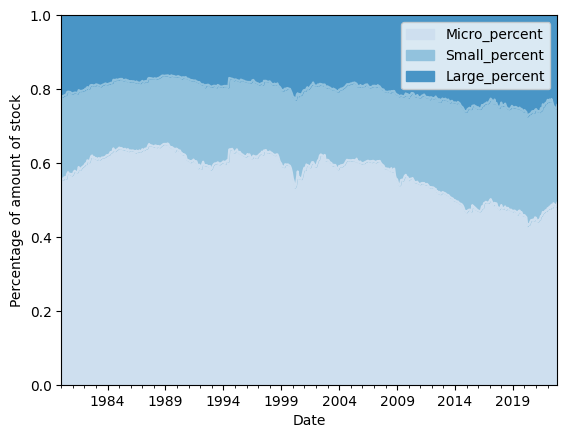

In [231]:
plt.figure(figsize=(25,3))
colors = ['#CEDFEF', '#92C2DD', '#4995C6']
percent.plot.area(stacked = True, color=colors)
plt.xlabel('Date')
plt.ylabel('Percentage of amount of stock')
plt.ylim([0,1])
# Display the legend
plt.legend(loc='upper right')
# Display the plot
# plt.savefig(file_name+'/microcaps.png',bbox_inches='tight') 
plt.show()

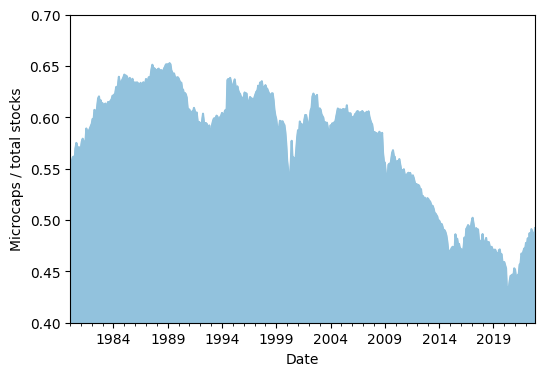

In [189]:
percent = date_df['Micro'] /(date_df['Micro'] +date_df['Small'] + date_df['Large'])
plt.figure(figsize=(6,4))

percent.plot.area(color = '#92C2DD')
plt.ylim([0.4, 0.7])
plt.xlabel('Date')
plt.ylabel('Microcaps / total stocks')
# Display the plot
plt.savefig(file_name+'/microcaps_percent.png',bbox_inches='tight') 
plt.show()

## 2.4Top features with highest proportion of NaNs

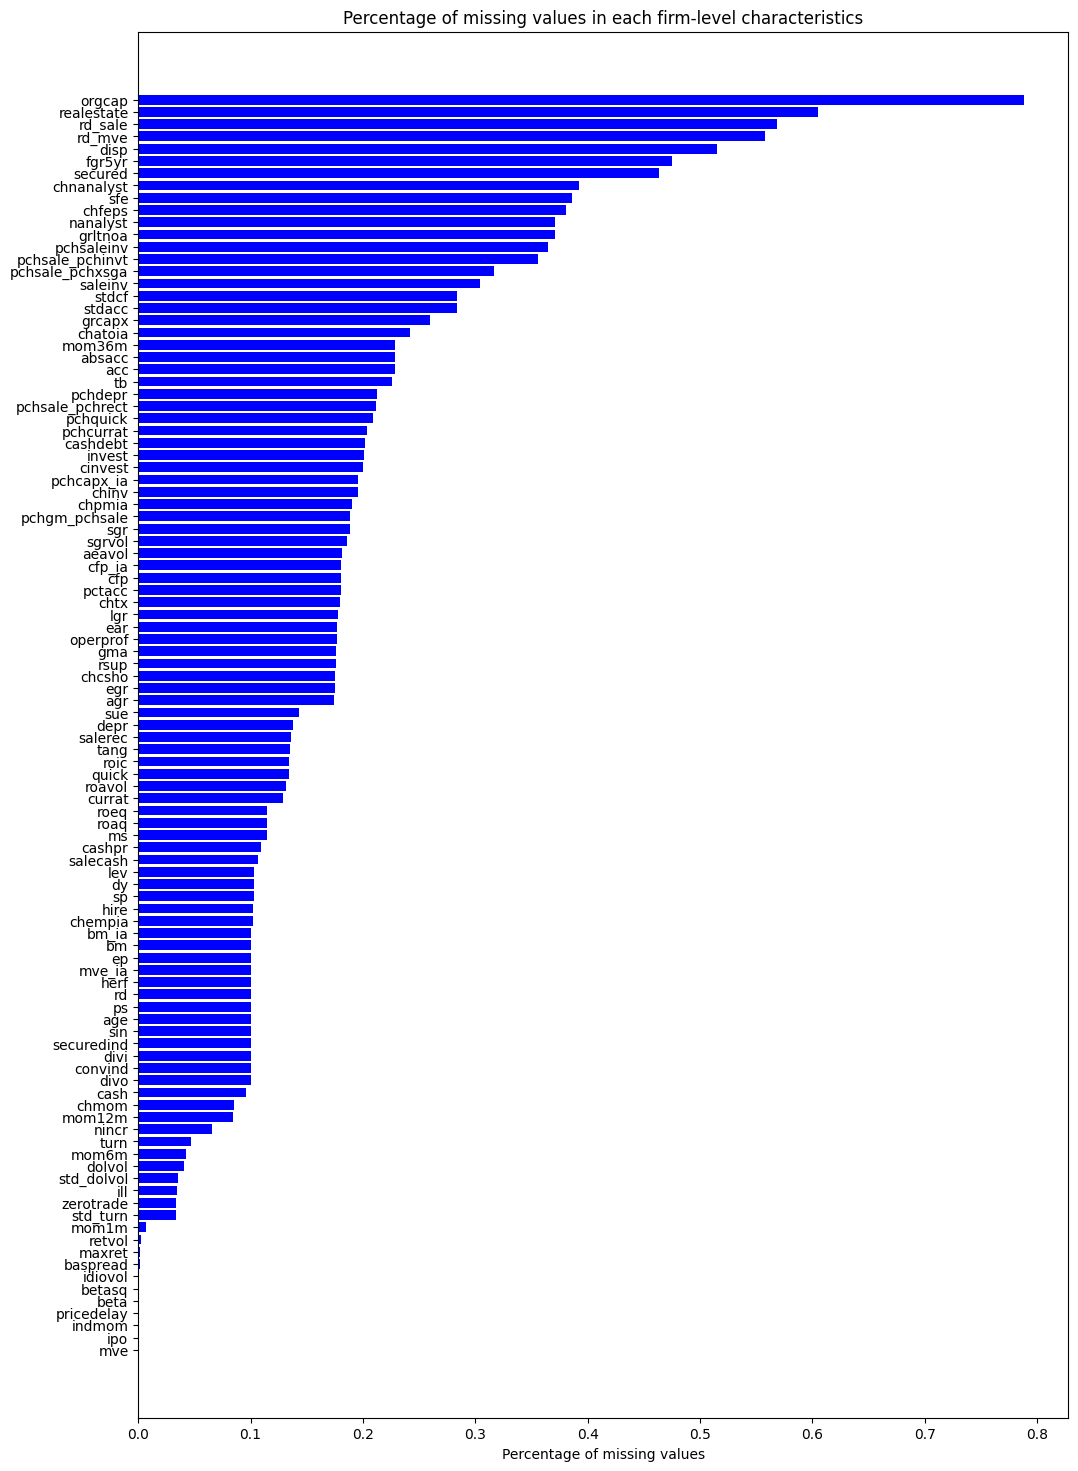

In [236]:
data_raw = pd.read_pickle(file_name+'7_chars_data.pkl')

data_ = data_raw[char_dic['firm_variable']].copy()
num_na = (data_.isnull().sum() / len(data_)).reset_index()
num_na.columns = ['field','proportion']
num_na = num_na.sort_values(by = 'proportion', ascending = True)
ind = np.arange(num_na.shape[0])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, num_na.proportion.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(num_na.field.values, rotation='horizontal')
ax.set_xlabel("Percentage of missing values")
ax.set_title("Percentage of missing values in each firm-level characteristics")
plt.show()

In [247]:
num_na.sort_values(by = 'proportion', ascending = False)[:5]

,field,proportion
60,orgcap,0.788185
77,realestate,0.604562
76,rd_sale,0.568813
75,rd_mve,0.557866
28,disp,0.515127


In [245]:
print(f'{len(num_na[num_na["proportion"] == 0])} variables have no missing values')
# 2%
print(f'{len(num_na[num_na["proportion"] != 0])} variables have missing values') 
#98%

2 variables have no missing values
101 variables have missing values


## 2.5Top most predictive features

In [275]:
from scipy.stats import spearmanr
spearman = {}
for feature in char_dic['firm_variable']:
    x1 = data[feature]
    x2 = data['predicted_return']
    bad = ~np.logical_or(np.isnan(x1), np.isnan(x2))
    score = spearmanr(np.compress(bad, x1), np.compress(bad, x2))[0]
    spearman[feature] = score
spearman = pd.Series(spearman)

In [276]:
df_firm = spearman.apply(np.abs).sort_values(ascending=False) * spearman.apply(np.sign)[spearman.apply(np.abs).sort_values(ascending=False).index]
df_firm = pd.DataFrame(df_firm, columns = ['spearman'])
df_firm.head()

,spearman
baspread,-0.083990
retvol,-0.077951
maxret,-0.067527
ep,0.065930
roavol,-0.065539


In [262]:
from scipy.stats import spearmanr
macro_ = macro.iloc[:-1]
data_ = data[data['permno'] == 50789]
# list of permnon that has 515 available data 
# [50550,50606,50789,50876,50948,51086,51263,]
spearman = {}

In [268]:
for feature in char_dic['macro_variable']:
    x1 = macro_[feature]
    x2 = data_['predicted_return']
    score = spearmanr(x1,x2)[0]
    spearman[feature] = score
spearman = pd.Series(spearman)

In [274]:
df_macro = spearman.apply(np.abs).sort_values(ascending=False) * spearman.apply(np.sign)[spearman.apply(np.abs).sort_values(ascending=False).index]
df_macro = pd.DataFrame(df_macro, columns = ['spearman'])
df_macro.head()

,spearman
ep,0.148412
HWIURATIO,-0.129845
HWI,-0.126610
S&P: indust,-0.125220
dp,0.123320
